### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  의 문자열 변수  

In [198]:
import pandas as pd

# 데이터를 읽어옵니다.
cs_df = pd.read_csv('./datasets/customer_shopping_data.csv')
cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [199]:
# info()를 통해 데이터를 확인해봅니다.
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


#### 중복 행 검사

In [200]:
cs_df.duplicated().sum()

0

#### 결측치 검사

In [201]:
cs_df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

#### 이상치(Outlier) 검사

In [202]:
# 나이(age)에 대한 이상치 검사
cs_df[cs_df['age'] <= 0]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [203]:
pd.DataFrame(cs_df['age'].describe()).T

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.0,30.0,43.0,56.0,69.0


#### 나이의 최솟값이 18세, 최댓값이 69세로 특별한 이상치가 나타나지 않음을 확인할 수 있다.

In [204]:
# 수량(quantity)에 대한 이상치 검사
cs_df[cs_df['quantity'] <= 0]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [205]:
pd.DataFrame(cs_df['quantity'].describe()).T

,count,mean,std,min,25%,50%,75%,max
quantity,99457.0,3.003429,1.413025,1.0,2.0,3.0,4.0,5.0


#### 최소 수량이 1개, 최대 수량이 5개로 특별한 이상치가 나타나지 않음을 확인할 수 있다.

In [206]:
# 가격(price)에 대한 이상치 검사
cs_df[cs_df['price'] <= 0]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [207]:
pd.DataFrame(cs_df['price'].describe()).T

,count,mean,std,min,25%,50%,75%,max
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


#### 마찬가지로 최저 가격이 5.23리라, 최고 가격이 5250리라로 특별한 이상치가 나타나지 않음을 확인할 수 있다.

In [208]:
# 성별에 대한 이상치 검사(Male/Female 외의 다른 값이 있는지)
cs_df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

#### 성별에는 특별한 이상치가 나타나지 않았다.

In [209]:
# 결제 방식(payment_method)에 대한 이상치 검사(유효하지 않은 값이 있는지)
cs_df['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

#### 결제 방식 또한 현금, 신용카드, 체크카드 3가지 중의 하나로, 특별한 이상치가 나타나지 않았다.

In [210]:
display(cs_df)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


### 데이터 전처리 및 RFM Score 계산
- 송장 번호(invoice_no) 컬럼 삭제
- CustomerID 별로 invoice_date를 가장 최근 날짜를 기준으로 차감하여 Recency 계산
- CustomerID 별로 quantity의 총합을 구하여 Frequency 계산
- CustomerID 별로 quantity * price 의 총합을 구하여 Monetary 계산

#### 1) invoice_no 컬럼 삭제

In [211]:
# invoice_no 컬럼 삭제
cs_df.drop(columns=['invoice_no'], axis=1, inplace=True)
cs_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


#### 2) Recency 계산

In [212]:
# invoice_date를 datetime type으로 변환
cs_df['invoice_date'] = pd.to_datetime(cs_df['invoice_date'], format='%d/%m/%Y')
cs_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


In [213]:
# invoice_date를 가장 최근 날짜를 기준으로 차감하여 days로 변환
# 가장 최근 날짜 구하기
cs_df['invoice_date'].sort_values(ascending=False)
recent_date = pd.to_datetime('2023-03-09')
recent_date

Timestamp('2023-03-09 00:00:00')

In [214]:
# 이를 기준으로 날짜(일수, days)의 차이를 구하여 Recency 컬럼에 저장
cs_df['Recency'] = (recent_date - pd.to_datetime(cs_df['invoice_date'], format='%d/%m/%Y')).dt.days
cs_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501
...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723


In [215]:
# CustomerID 별로 Recency의 최댓값을 새로운 df에 저장
cs_rfm_df = pd.DataFrame(cs_df.groupby('customer_id')['Recency'].max())
cs_rfm_df

,Recency
customer_id,
C100004,468
C100005,6
C100006,98
C100012,571
C100019,592
...,...
C999886,1
C999910,124
C999974,303


In [216]:
# reset_index()를 통해 customer_id를 컬럼으로 변경
cs_rfm_df.reset_index(inplace=True)
cs_rfm_df

,customer_id,Recency
0,C100004,468
1,C100005,6
2,C100006,98
3,C100012,571
4,C100019,592
...,...,...
99452,C999886,1
99453,C999910,124
99454,C999974,303
99455,C999976,262


In [217]:
# cs_df에서 Recency 컬럼 삭제
cs_df.drop(columns='Recency', inplace=True, axis=1)
cs_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


#### 3) Frequency 계산

In [218]:
# 각 customer_id 별로 quantity(수량)의 총합을 구하여 새로운 df에 저장
cs_f_df = pd.DataFrame(cs_df.groupby('customer_id')['quantity'].sum()).reset_index().rename(columns={'quantity': 'Frequency'})
cs_f_df

,customer_id,Frequency
0,C100004,5
1,C100005,2
2,C100006,3
3,C100012,5
4,C100019,1
...,...,...
99452,C999886,3
99453,C999910,3
99454,C999974,5
99455,C999976,3


In [219]:
cs_rfm_df = cs_rfm_df.merge(cs_f_df, on='customer_id')
cs_rfm_df

,customer_id,Recency,Frequency
0,C100004,468,5
1,C100005,6,2
2,C100006,98,3
3,C100012,571,5
4,C100019,592,1
...,...,...,...
99452,C999886,1,3
99453,C999910,124,3
99454,C999974,303,5
99455,C999976,262,3


#### 4) Monetary 계산

In [220]:
cs_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


In [221]:
cs_m_df = pd.DataFrame(cs_df.groupby('customer_id').apply(lambda x: (x['quantity'] * x['price']).sum()))
cs_m_df

,0
customer_id,
C100004,7502.00
C100005,2400.68
C100006,322.56
C100012,130.75
C100019,35.84
...,...
C999886,47.07
C999910,136.35
C999974,7502.00


In [222]:
cs_m_df.columns = ['Monetary']
cs_m_df

,Monetary
customer_id,
C100004,7502.00
C100005,2400.68
C100006,322.56
C100012,130.75
C100019,35.84
...,...
C999886,47.07
C999910,136.35
C999974,7502.00


In [223]:
cs_m_df.reset_index(inplace=True)
cs_m_df

,customer_id,Monetary
0,C100004,7502.00
1,C100005,2400.68
2,C100006,322.56
3,C100012,130.75
4,C100019,35.84
...,...,...
99452,C999886,47.07
99453,C999910,136.35
99454,C999974,7502.00
99455,C999976,322.56


In [224]:
cs_rfm_df = cs_rfm_df.merge(cs_m_df, on='customer_id')
cs_rfm_df

,customer_id,Recency,Frequency,Monetary
0,C100004,468,5,7502.00
1,C100005,6,2,2400.68
2,C100006,98,3,322.56
3,C100012,571,5,130.75
4,C100019,592,1,35.84
...,...,...,...,...
99452,C999886,1,3,47.07
99453,C999910,124,3,136.35
99454,C999974,303,5,7502.00
99455,C999976,262,3,322.56


### RFM Score 계산하기
- Recency, Frequency, Monetary에 대하여 MinMaxScaler를 통해 정규화(Normalization) 진행

In [225]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(cs_rfm_df[['Recency', 'Frequency', 'Monetary']])

In [226]:
cs_rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
cs_rfm_df

,customer_id,Recency,Frequency,Monetary
0,C100004,0.586683,1.00,0.285648
1,C100005,0.006281,0.25,0.091273
2,C100006,0.121859,0.50,0.012091
3,C100012,0.716080,1.00,0.004783
4,C100019,0.742462,0.00,0.001166
...,...,...,...,...
99452,C999886,0.000000,0.50,0.001594
99453,C999910,0.154523,0.50,0.004996
99454,C999974,0.379397,1.00,0.285648
99455,C999976,0.327889,0.50,0.012091


In [227]:
# Recency 수치가 반대로 되어있으므로 1에서 뺀 값으로 바꿔준다.
cs_rfm_df['Recency'] = 1 - cs_rfm_df['Recency']
cs_rfm_df

,customer_id,Recency,Frequency,Monetary
0,C100004,0.413317,1.00,0.285648
1,C100005,0.993719,0.25,0.091273
2,C100006,0.878141,0.50,0.012091
3,C100012,0.283920,1.00,0.004783
4,C100019,0.257538,0.00,0.001166
...,...,...,...,...
99452,C999886,1.000000,0.50,0.001594
99453,C999910,0.845477,0.50,0.004996
99454,C999974,0.620603,1.00,0.285648
99455,C999976,0.672111,0.50,0.012091


In [228]:
# Recency, Frequency, Monetary 수치를 더한 TotalScore 값을 저장
cs_rfm_df.loc[:, 'TotalScore'] = cs_rfm_df['Recency'] + cs_rfm_df['Frequency'] + cs_rfm_df['Monetary']
cs_rfm_df

,customer_id,Recency,Frequency,Monetary,TotalScore
0,C100004,0.413317,1.00,0.285648,1.698965
1,C100005,0.993719,0.25,0.091273,1.334992
2,C100006,0.878141,0.50,0.012091,1.390232
3,C100012,0.283920,1.00,0.004783,1.288702
4,C100019,0.257538,0.00,0.001166,0.258704
...,...,...,...,...,...
99452,C999886,1.000000,0.50,0.001594,1.501594
99453,C999910,0.845477,0.50,0.004996,1.350473
99454,C999974,0.620603,1.00,0.285648,1.906251
99455,C999976,0.672111,0.50,0.012091,1.184202


In [229]:
cs_result_df = cs_df.merge(cs_rfm_df[['customer_id', 'TotalScore']], on='customer_id')
cs_result_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896
...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893


#### RFM Score를 기준으로 customer_id 별 고객 등급 나누기

In [230]:
import numpy as np

l1, l2, l3, l4 = np.percentile(cs_result_df['TotalScore'], [20, 45, 70, 90])
print(l1, l2, l3, l4)

0.6209409560600792 0.9969507080906359 1.3808011494448058 1.8183114666714846


In [231]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [232]:
cs_result_df['Level'] = cs_result_df['TotalScore'].apply(get_level)
cs_result_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore,Level
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548,1
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031,3
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194,5
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103,2
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896,3
...,...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919,2
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256,5
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638,5
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893,2


In [233]:
order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

cs_result_df['Level'] = cs_result_df['Level'].replace([5, 4, 3, 2, 1], order)
cs_result_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore,Level
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548,VIP
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031,Gold
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194,Bronze
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103,Diamond
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896,Gold
...,...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919,Diamond
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256,Bronze
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638,Bronze
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893,Diamond


In [234]:
print(cs_result_df['Level'].value_counts())

Level
Silver     24864
Gold       24861
Bronze     19895
Diamond    19895
VIP         9942
Name: count, dtype: int64


## 데이터 시각화 및 분석

#### 📌1. 등급별 고객 수 시각화하기

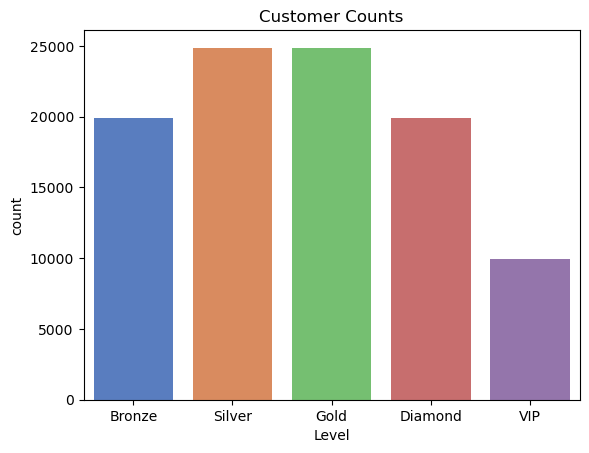

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
sns.countplot(x='Level', data=cs_result_df, palette='muted', order=order)
plt.title('Customer Counts')
plt.show()

#### 🖥️시각화 결과
<sub>Silver와 Gold 등급의 고객 수가 가장 많고, Bronze와 Diamond 등급의 고객 수는 그 다음으로 많았으며 VIP 등급의 고객 수는 상대적으로 적게 나타났다.</sub>

#### 📌2. 성별에 따른 고객 등급 분포

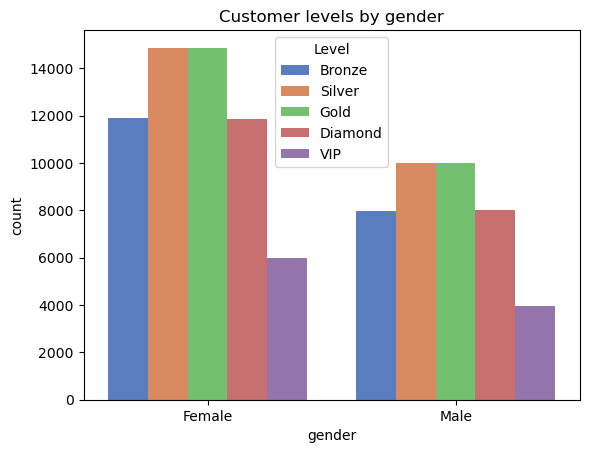

In [236]:
order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
sns.countplot(x='gender', hue='Level', hue_order=order, palette='muted', data=cs_result_df)
plt.title('Customer levels by gender')
plt.show()

#### 🖥️시각화 결과
<sub>성별에 따른 등급 분포는 여성과 남성이 서로 유사한 양상을 보였다.</sub>

#### 📌3. 연령대별(10대~60대 이상) 고객 등급 분포

In [237]:
# 나이(age)를 입력 받아 문자열로 연령대를 리턴하는 함수
def get_age_group(age):
    return f'{age // 10}0s'

In [238]:
cs_age_df = cs_result_df.copy()
cs_age_df['age_group'] = cs_age_df['age'].apply(get_age_group)
cs_age_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore,Level,age_group
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548,VIP,20s
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031,Gold,20s
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194,Bronze,20s
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103,Diamond,60s
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896,Gold,50s
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919,Diamond,40s
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256,Bronze,20s
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638,Bronze,60s
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893,Diamond,50s


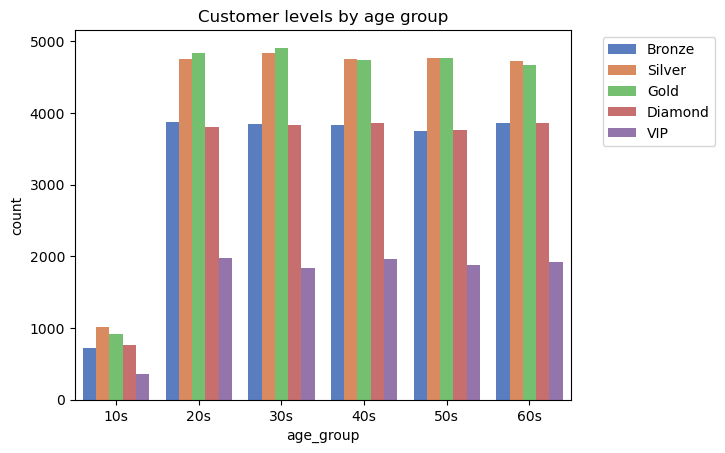

In [239]:
hue_order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
age_order = [f'{i}0s' for i in range(1, 7)]

sns.countplot(x='age_group', hue='Level', hue_order=order, order=age_order, data=cs_age_df, palette='muted')
plt.title('Customer levels by age group')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

#### 🖥️시각화 결과
<sub>연령대별 고객들의 등급 분포를 시각화한 결과, 표본의 수가 상대적으로 적은 10대를 제외한 전 연령대에서 등급별 고객 분포가 매우 유사한 양상을 보였다.</sub>

#### 📌4. 상품 카테고리별 고객 등급 분포

In [240]:
cs_result_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore,Level
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548,VIP
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031,Gold
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194,Bronze
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103,Diamond
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896,Gold
...,...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919,Diamond
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256,Bronze
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638,Bronze
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893,Diamond


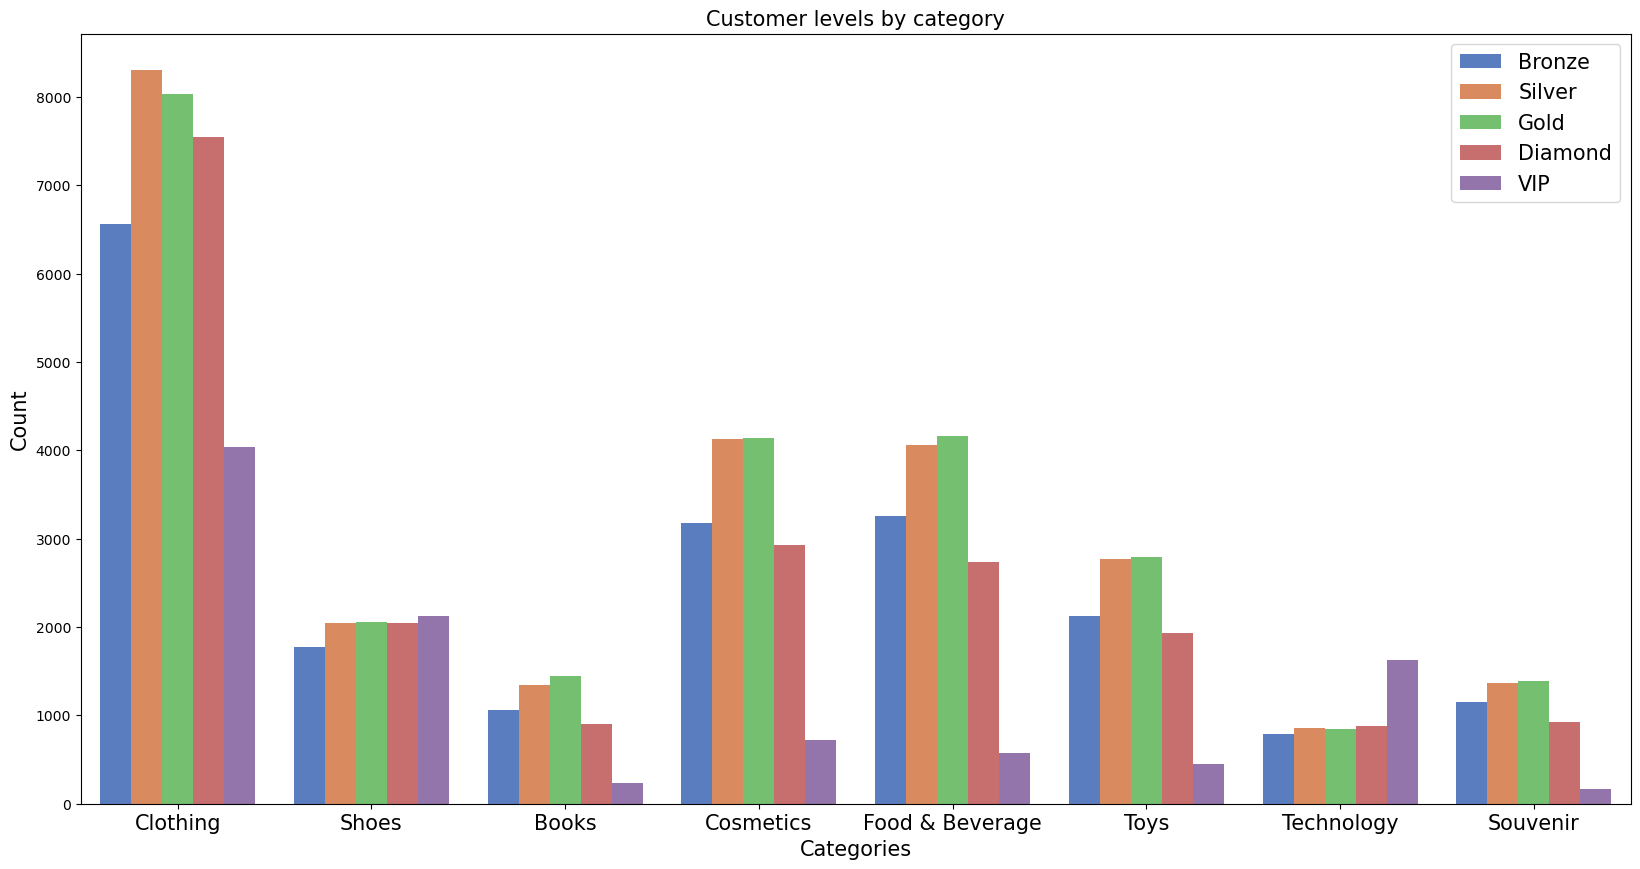

In [241]:
hue_order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

plt.figure(figsize=(20, 10))
sns.countplot(x='category', hue='Level', hue_order=hue_order, palette='muted', data=cs_result_df)
plt.title('Customer levels by category', fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(fontsize=15)
plt.show()

#### **이 중에서 의류(Clothing), 신발(Shoes), 도서(Books), 기술(Technology) 카테고리의 특징을 살펴보겠습니다.**

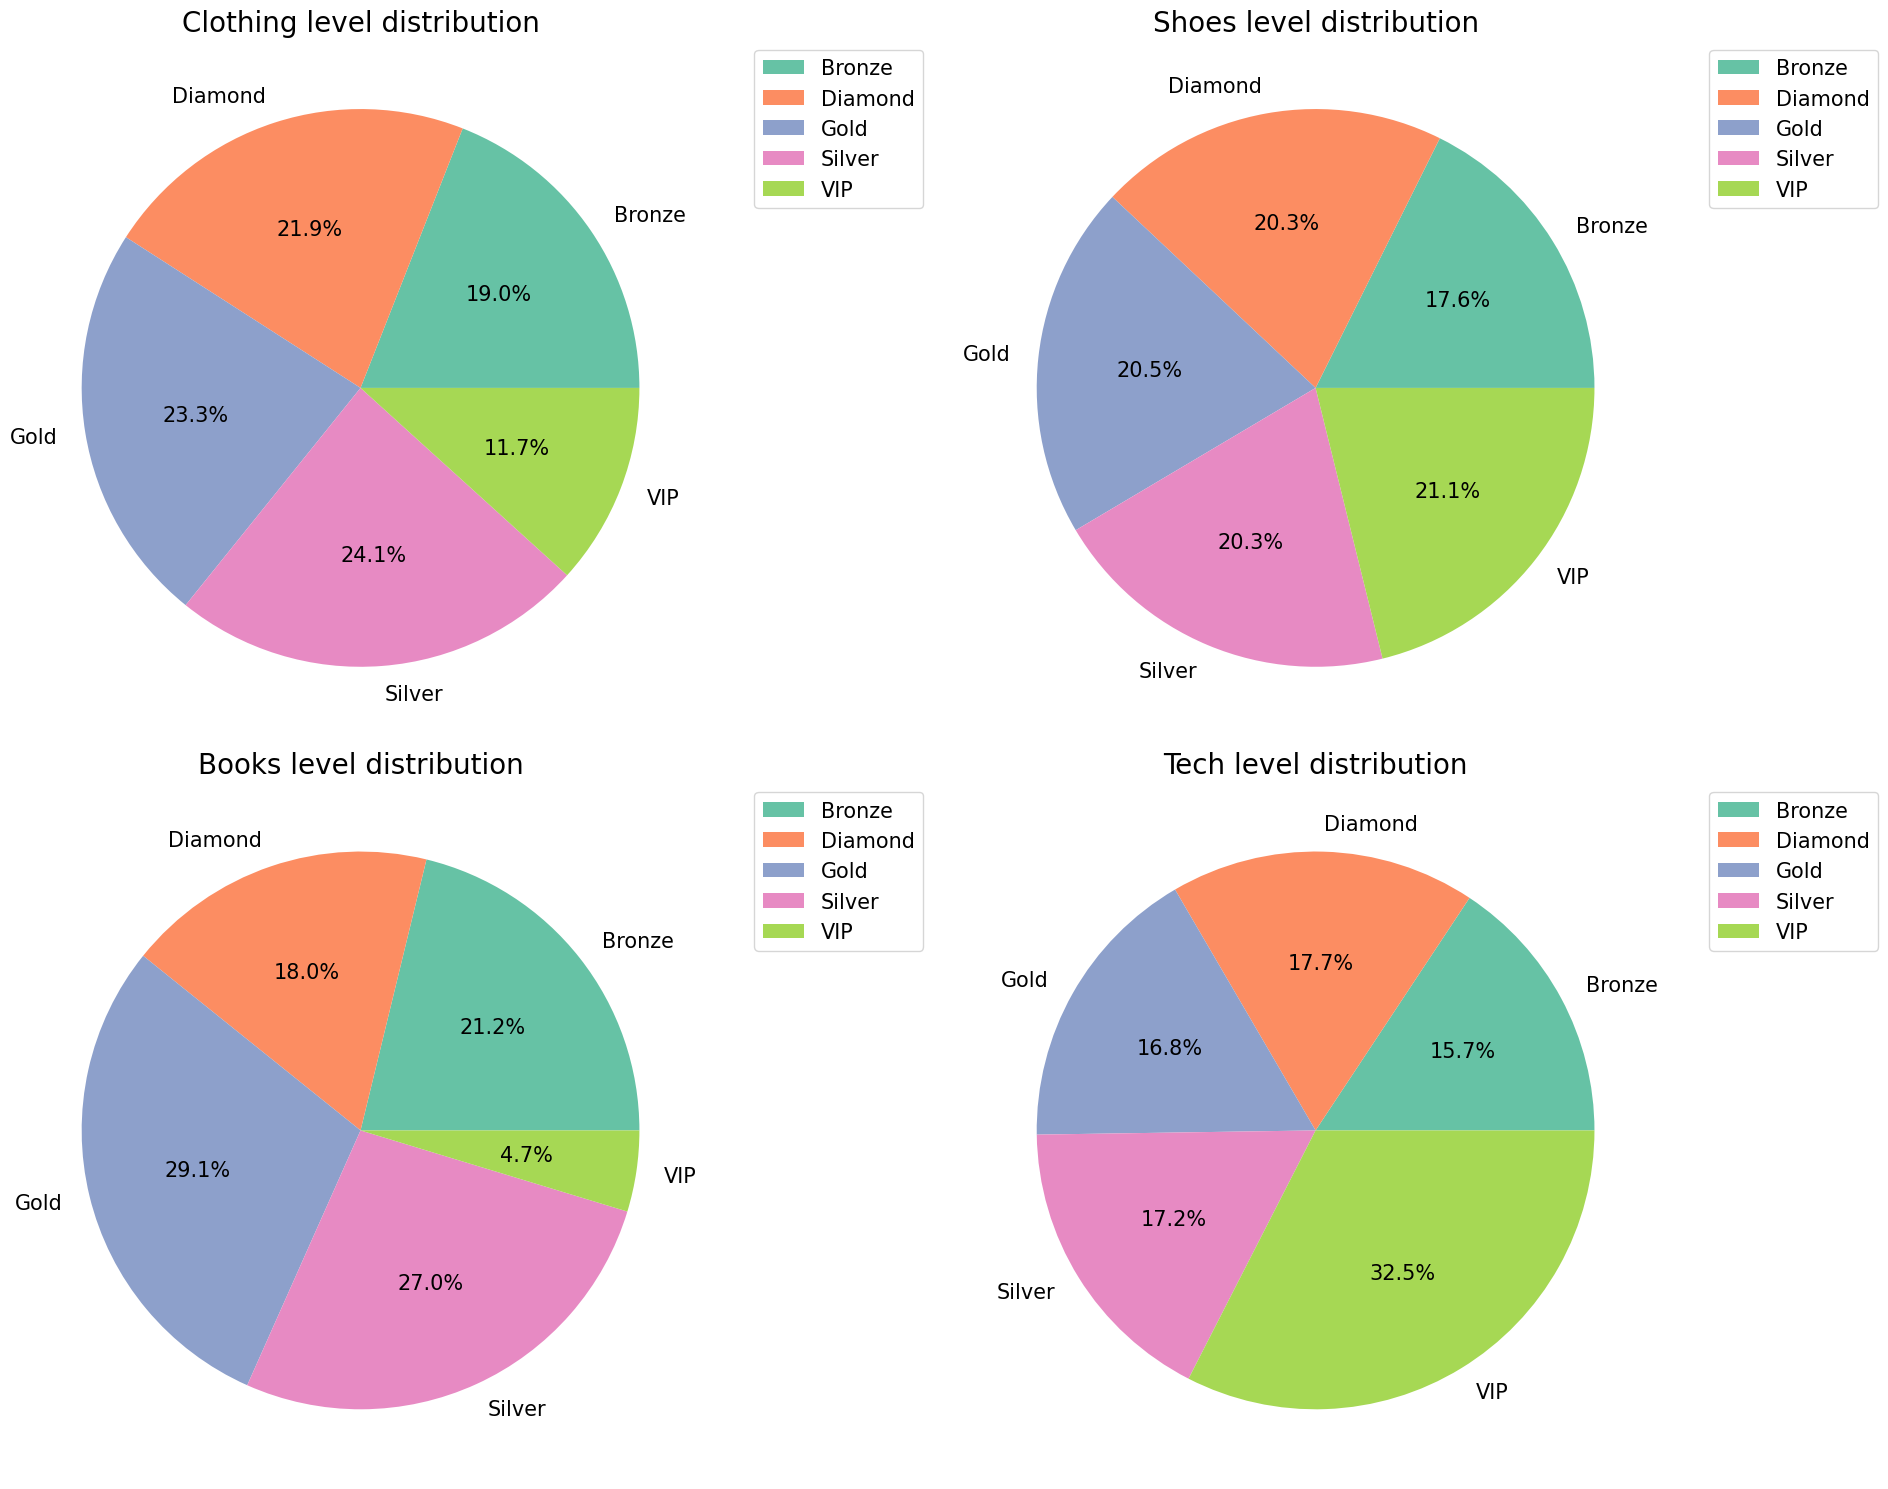

In [242]:
# Clothing, Shoes, Books, Technology 를 각각 파이 차트로 시각화
cs_cloth_df = pd.DataFrame(cs_result_df[cs_result_df['category'] == 'Clothing'].groupby('Level').count().loc[:, 'customer_id'])
cs_shoes_df = pd.DataFrame(cs_result_df[cs_result_df['category'] == 'Shoes'].groupby('Level').count().loc[:, 'customer_id'])
cs_books_df = pd.DataFrame(cs_result_df[cs_result_df['category'] == 'Books'].groupby('Level').count().loc[:, 'customer_id'])
cs_tech_df = pd.DataFrame(cs_result_df[cs_result_df['category'] == 'Technology'].groupby('Level').count().loc[:, 'customer_id'])

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

colors = plt.cm.Set2(range(5))

axes = axes.flatten()
axes[0].pie(x='customer_id', labels=cs_cloth_df.index, data=cs_cloth_df, autopct='%1.1f%%', textprops={'fontsize': 15}, colors=colors)
axes[0].set_title('Clothing level distribution', fontsize=20)
axes[0].legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

axes[1].pie(x='customer_id', labels=cs_shoes_df.index, data=cs_shoes_df, autopct='%1.1f%%', textprops={'fontsize': 15}, colors=colors)
axes[1].set_title('Shoes level distribution', fontsize=20)
axes[1].legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

axes[2].pie(x='customer_id', labels=cs_books_df.index, data=cs_books_df, autopct='%1.1f%%', textprops={'fontsize': 15}, colors=colors)
axes[2].set_title('Books level distribution', fontsize=20)
axes[2].legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

axes[3].pie(x='customer_id', labels=cs_tech_df.index, data=cs_tech_df, autopct='%1.1f%%', textprops={'fontsize': 15}, colors=colors)
axes[3].set_title('Tech level distribution', fontsize=20)
axes[3].legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

plt.tight_layout()
plt.show()

#### 🖥️시각화 결과
- 의류(Clothing) 카테고리 제품의 경우, 전체 제품의 고객 등급 분포와 유사한 양상을 보여 해당 분포를 비교의 기준점으로 설정했다.
- 신발(Shoes) 카테고리 제품의 경우, 구매한 고객의 등급이 5개 등급에 고르게 분포했다. 해당 카테고리의 제품들은 신규 고객과 기존 고객 모두에게 인기 있는 제품들로 구성되어 있을 가능성이 높다.  
- 도서(Books) 카테고리 제품의 경우, 다른 등급에 비해 VIP 등급의 고객 비율이 현저히 낮은 양상을 보였다.
- 기술(Technology) 카테고리 제품의 경우, 반대로 VIP 등급의 고객 비율이 가장 높은 비율을 차지했다. 

#### *⏬가설 1: 해당 카테고리 제품들의 고객 등급 분포 차이는 성별에 따른 구매 동향의 차이에서 기인했을 것이다.*

#### 📌5. 상품 카테고리 및 성별에 따른 고객 등급 분포
- 4번 항목에서 살펴본 4가지 카테고리의 고객 등급 분포에 대해, 성별을 나누어 살펴보겠습니다.

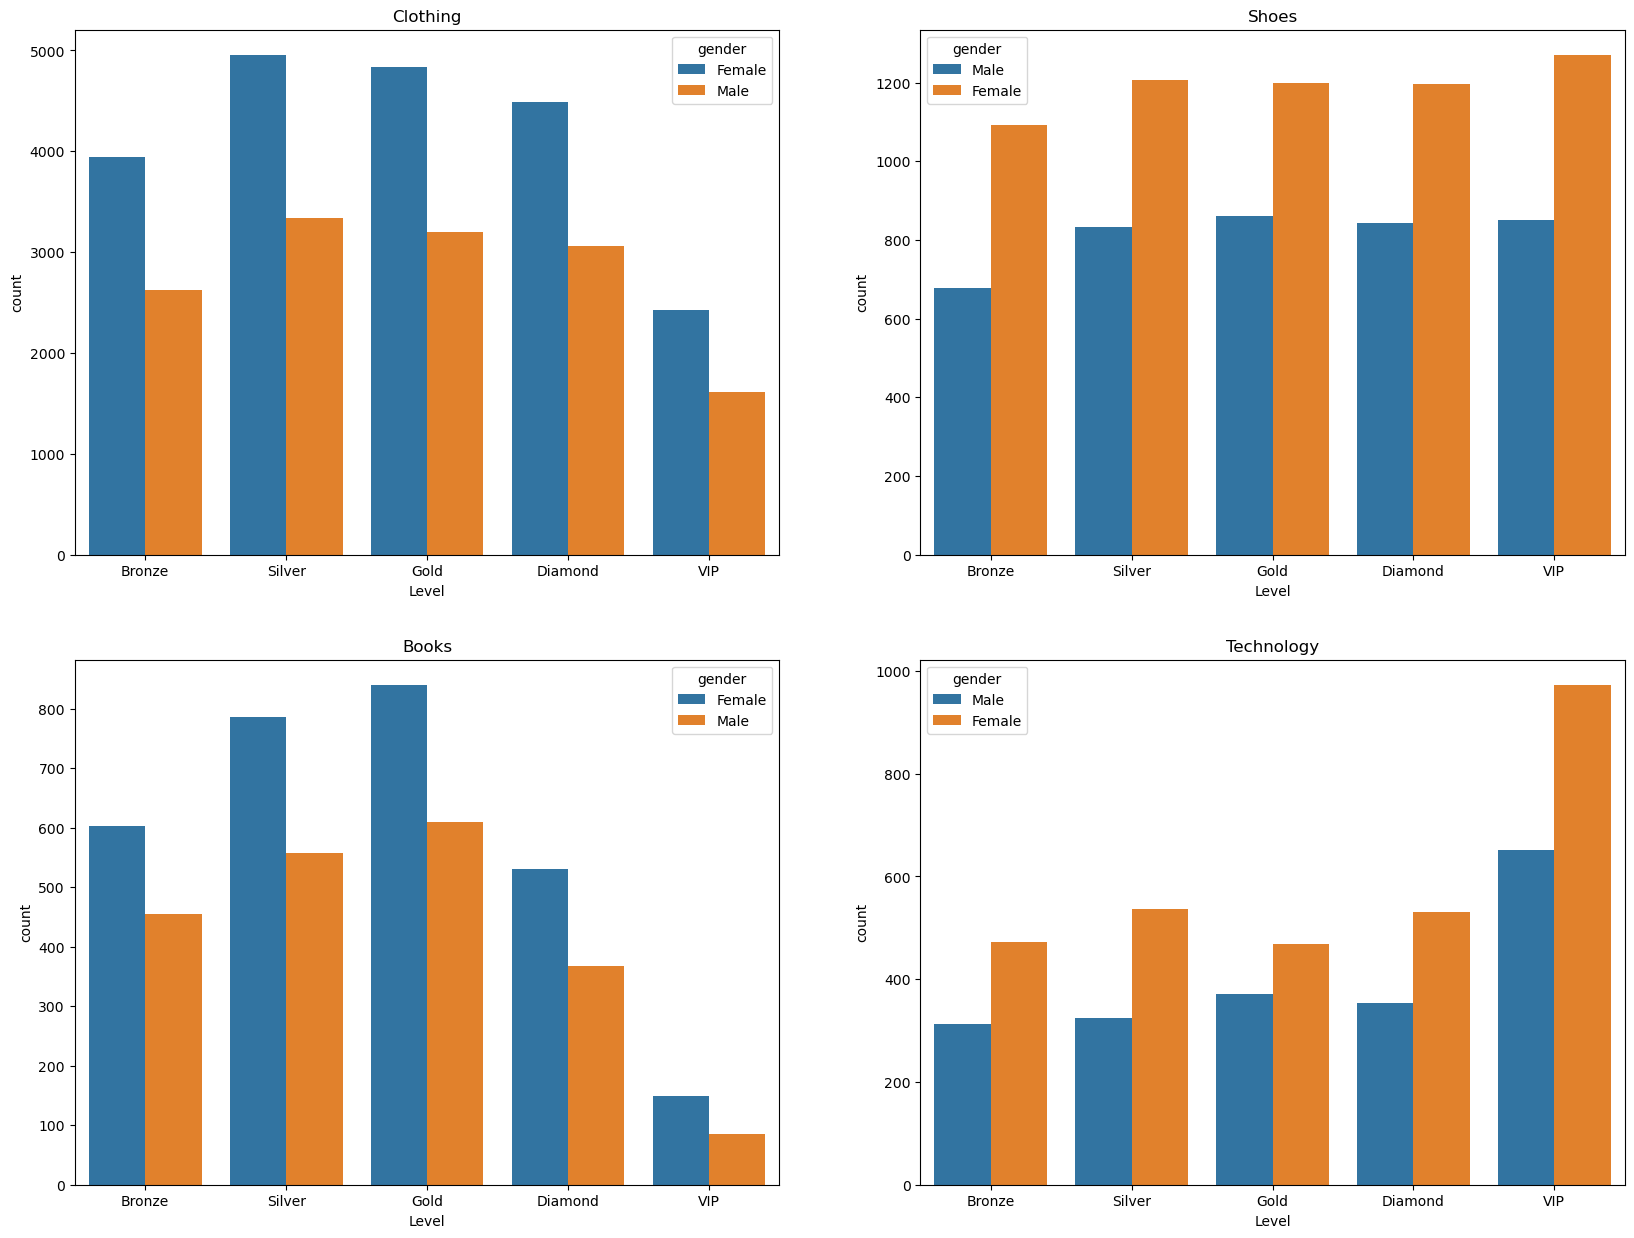

In [243]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
order=['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0, 0], x='Level', hue='gender', data=cs_result_df[cs_result_df['category'] == 'Clothing'], order=order)
sns.countplot(ax=axes[0, 1], x='Level', hue='gender', data=cs_result_df[cs_result_df['category'] == 'Shoes'], order=order)
sns.countplot(ax=axes[1, 0], x='Level', hue='gender', data=cs_result_df[cs_result_df['category'] == 'Books'], order=order)
sns.countplot(ax=axes[1, 1], x='Level', hue='gender', data=cs_result_df[cs_result_df['category'] == 'Technology'], order=order)

axes[0, 0].set_title('Clothing')
axes[0, 1].set_title('Shoes')
axes[1, 0].set_title('Books')
axes[1, 1].set_title('Technology')


plt.show()

#### 🖥️시각화 결과

<sub>앞서 살펴본 성별에 따른 고객 등급 분포 양상과 유사하게, 각 카테고리별 구매 고객의 등급별 비율의 차이는 성별에 따른 차이와 관계가 크지 않음을 알 수 있다.</sub>

#### ➡️귀무가설이 참이 아니었음을 알 수 있다.

#### *⏬가설 2: 해당 카테고리 제품들의 고객 등급 분포 차이는 쇼핑몰 점포에 따른 구매 동향의 차이에서 기인했을 것이다.*

#### 📌6. 상품 카테고리 및 쇼핑몰 점포에 따른 고객 등급 분포
- 4번 항목에서 살펴본 4가지 카테고리의 고객 등급 분포에 대해, 이번에는 쇼핑몰 점포별로 나누어 살펴보겠습니다.

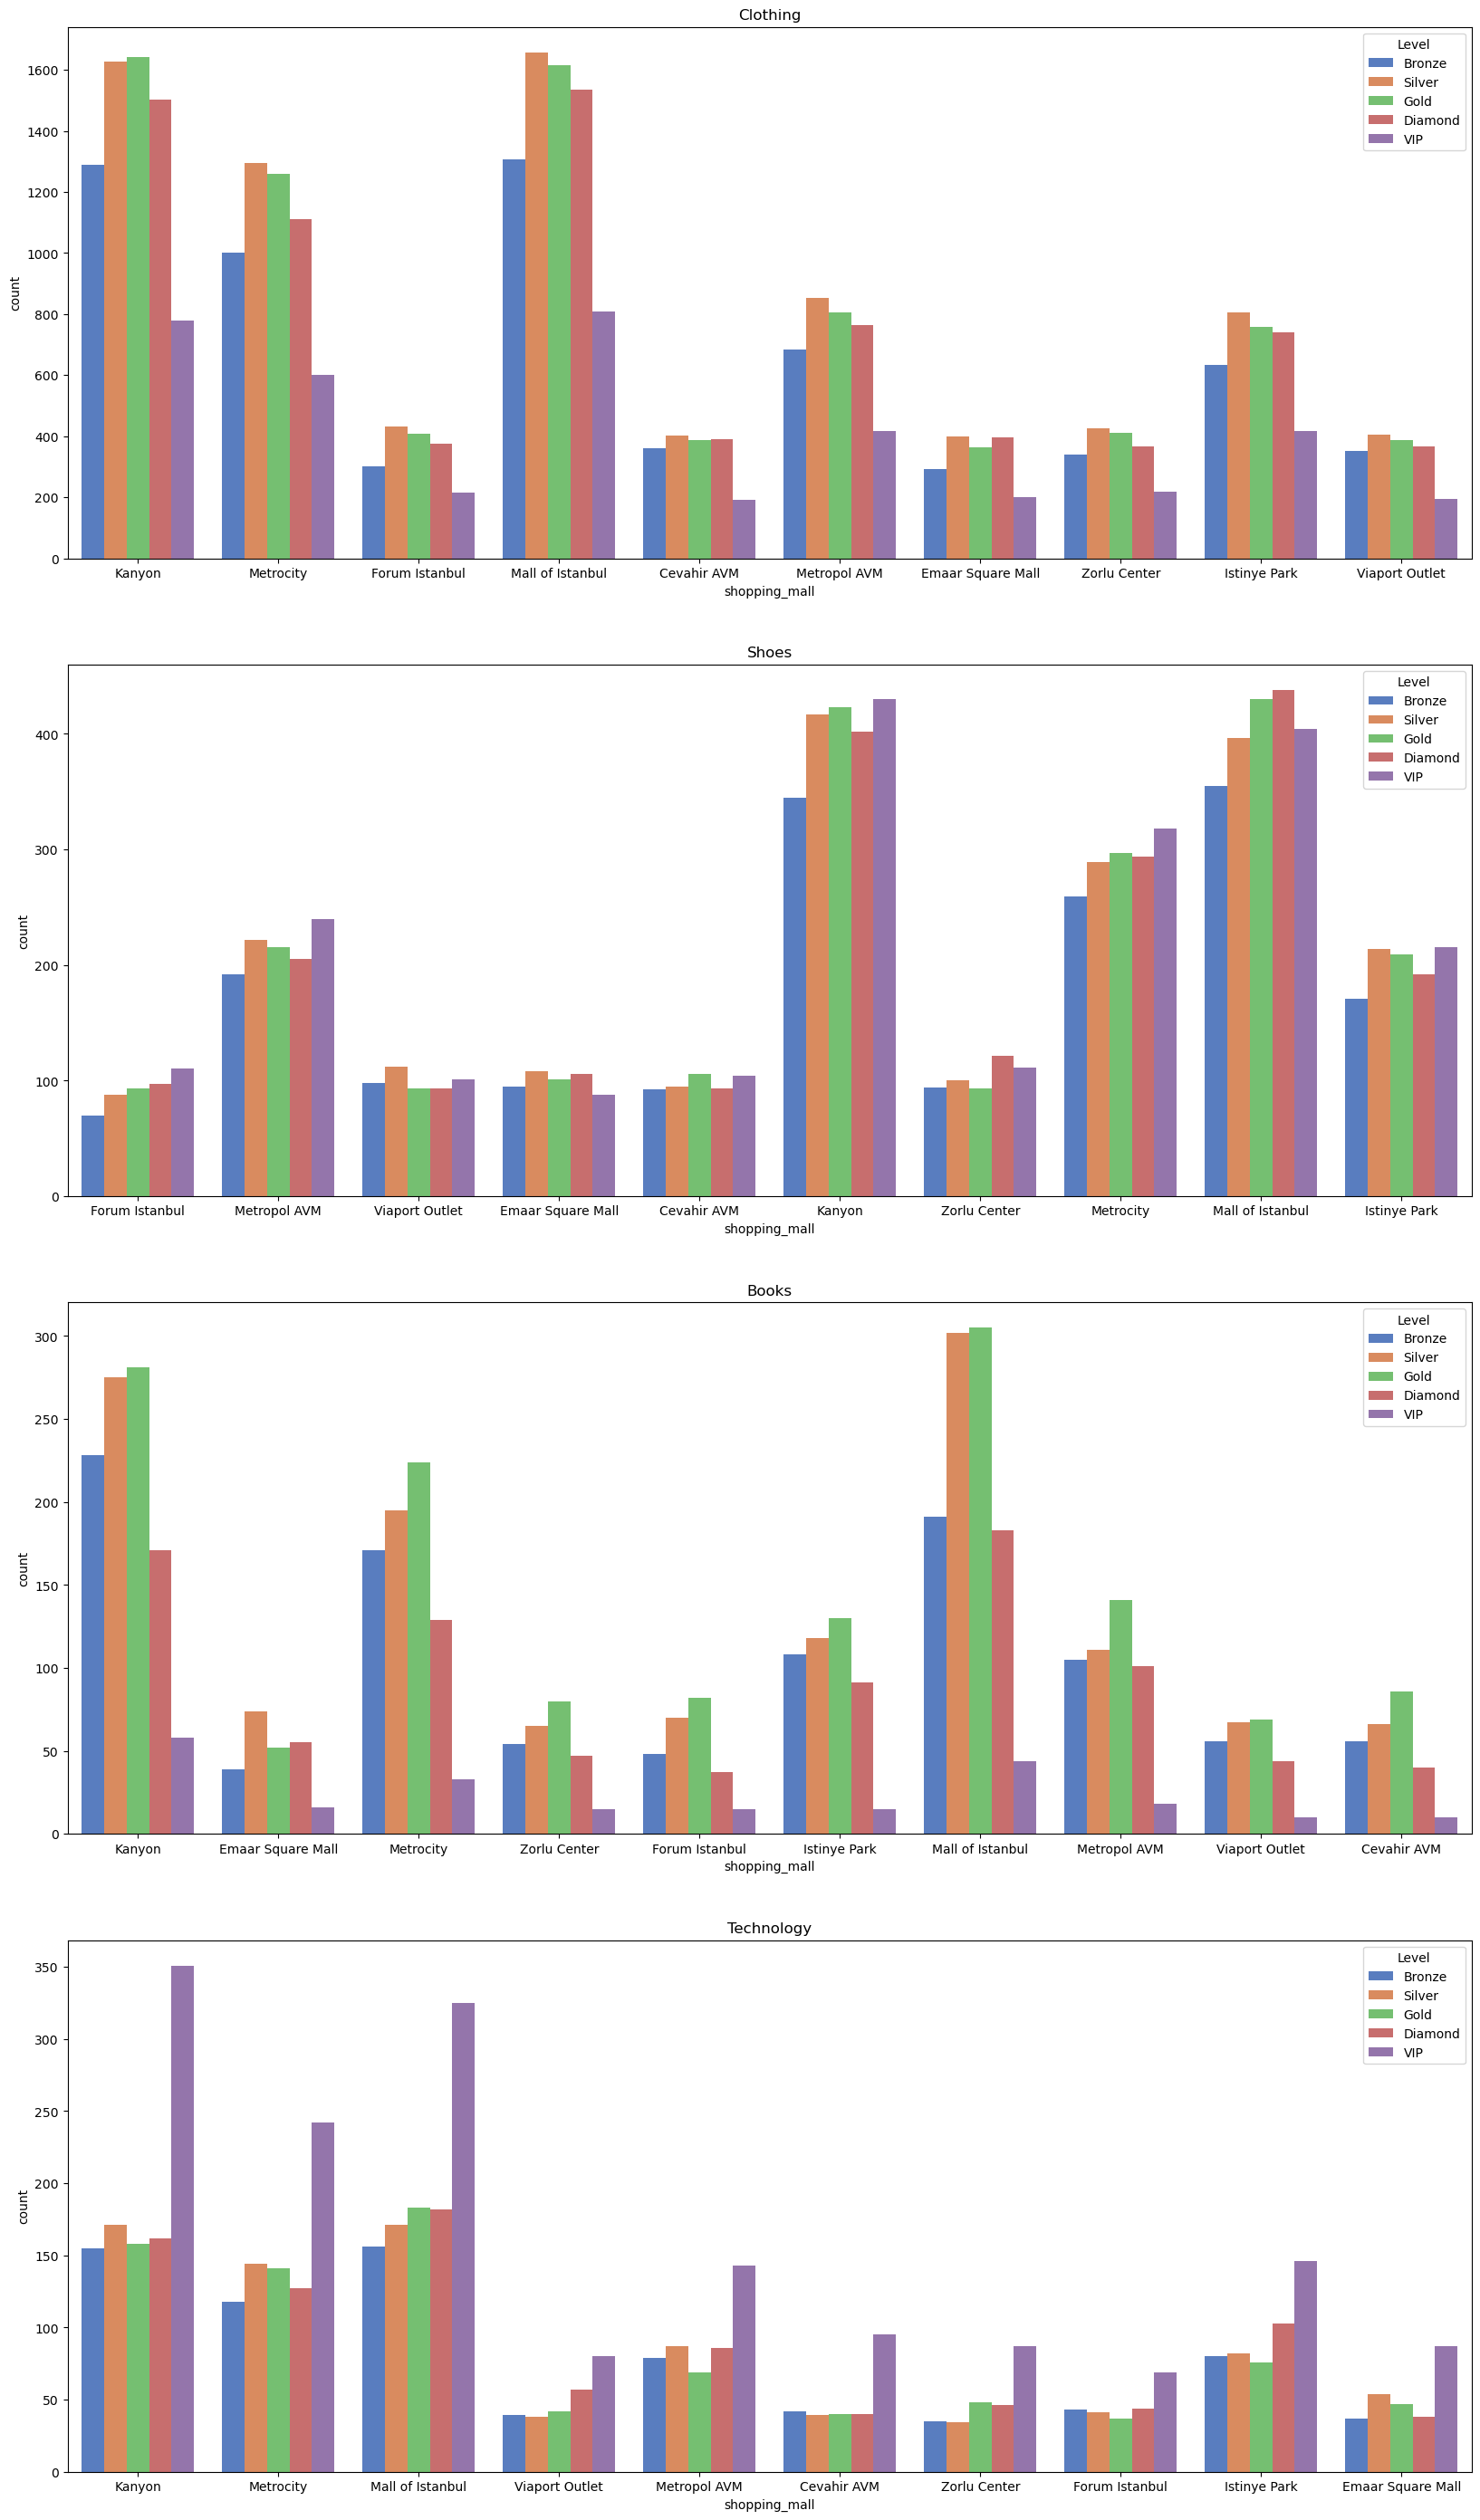

In [244]:
fig, axes = plt.subplots(4, 1, figsize=(20, 30))
order=['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='shopping_mall', hue='Level', data=cs_result_df[cs_result_df['category'] == 'Clothing'], hue_order=order, palette='muted')
sns.countplot(ax=axes[1], x='shopping_mall', hue='Level', data=cs_result_df[cs_result_df['category'] == 'Shoes'], hue_order=order, palette='muted')
sns.countplot(ax=axes[2], x='shopping_mall', hue='Level', data=cs_result_df[cs_result_df['category'] == 'Books'], hue_order=order, palette='muted')
sns.countplot(ax=axes[3], x='shopping_mall', hue='Level', data=cs_result_df[cs_result_df['category'] == 'Technology'], hue_order=order, palette='muted')

axes[0].set_title('Clothing')
axes[1].set_title('Shoes')
axes[2].set_title('Books')
axes[3].set_title('Technology')

plt.subplots_adjust(top=0.95, bottom=0.05)

plt.show()

#### 🖥️시각화 결과

- 앞서 전체 제품의 구매 고객 등급 분포와 유사한 양상을 보였던 의류(Clothing) 카테고리와 각자 다른 특징을 보였던 신발(Shoes), 도서(Books), 기술(Technology) 카테고리의 제품들 모두 쇼핑몰에 따른 고객 등급 집중 현상이 나타나지 않았다.

#### ➡️가설2 또한 참이 아니었음을 알 수 있다.

- **따라서 특정 카테고리 제품들의 주 구매층이 특정 고객 등급에 집중되어 나타나는 현상은,  
  성별이나 쇼핑몰 점포에 따른 결과가 아니라 해당 카테고리 혹은 제품 자체의 특성에 의한 것으로 보인다.**

#### *⏬가설 3: 해당 카테고리 제품들의 고객 등급 분포 차이는 카테고리별 제품 평균 가격의 차이에서 기인한다.*

#### 📌7. 상품 카테고리별 제품 평균 가격 분포
- 의류, 신발, 도서, 기술 카테고리의 제품들에 대하여 가격 분포를 살펴보겠습니다.

In [245]:
# 의류 카테고리 제품의 가격 분포
cs_cloth_price_df = pd.DataFrame(cs_result_df.loc[cs_result_df['category'] == 'Clothing', 'price'])
cs_cloth_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,34487.0,901.084021,424.225594,300.08,600.16,900.24,1200.32,1500.4


In [246]:
# 도서 카테고리 제품의 가격 분포
cs_book_price_df = pd.DataFrame(cs_result_df.loc[cs_result_df['category'] == 'Books', 'price'])
cs_book_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4981.0,45.568621,21.492662,15.15,30.3,45.45,60.6,75.75


In [247]:
# 기술 카테고리 제품의 가격 분포
cs_tech_price_df = pd.DataFrame(cs_result_df.loc[cs_result_df['category'] == 'Technology', 'price'])
cs_tech_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4996.0,3156.935548,1481.559805,1050.0,2100.0,3150.0,4200.0,5250.0


In [248]:
# 신발 카테고리 제품의 가격 분포
cs_shoes_price_df = pd.DataFrame(cs_result_df.loc[cs_result_df['category'] == 'Shoes', 'price'])
cs_shoes_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,10034.0,1807.388568,845.116269,600.17,1200.34,1800.51,2400.68,3000.85


In [249]:
cs_result_df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

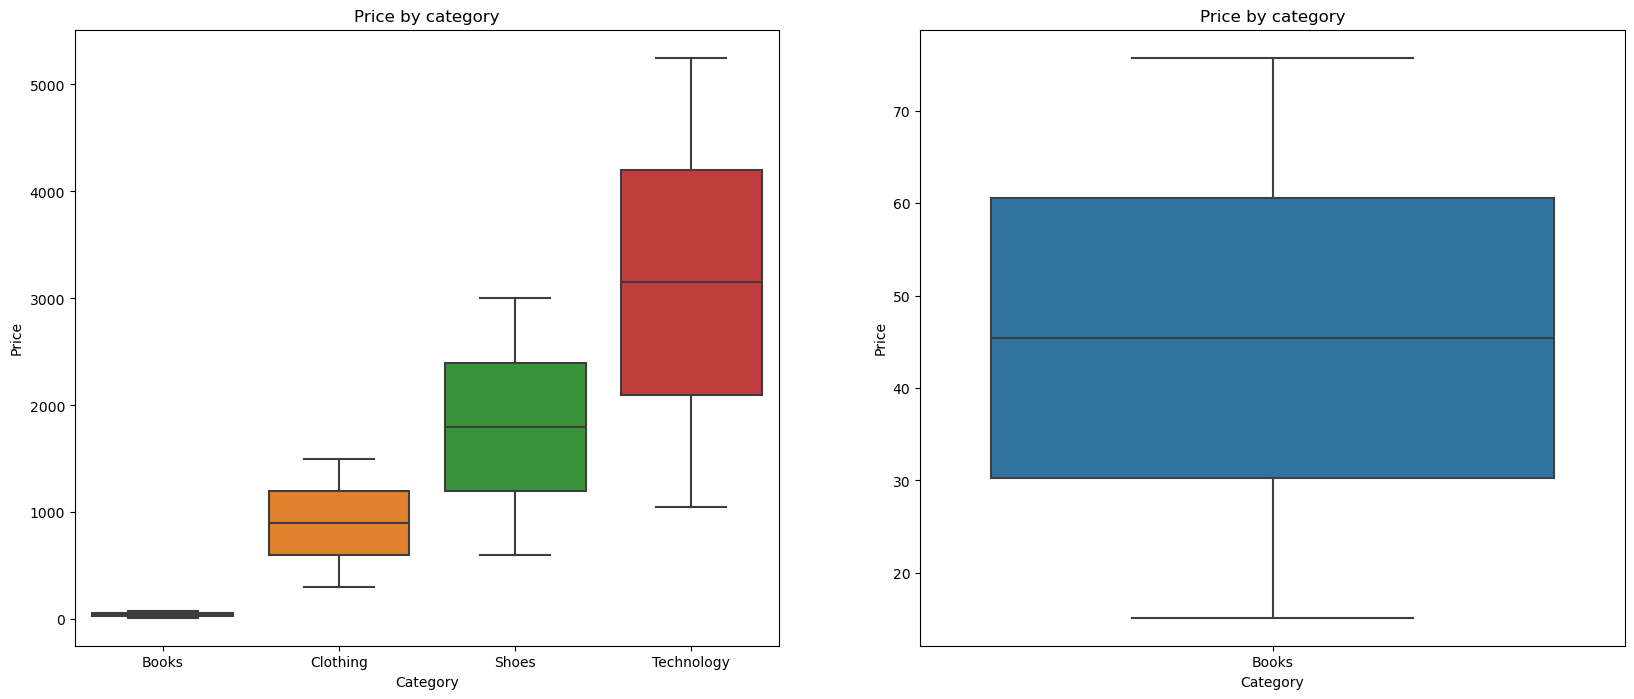

In [250]:
order = ['Books', 'Clothing', 'Shoes', 'Technology']
price_df = cs_result_df[['category', 'price']]
price_df = price_df[~((price_df['category'] == 'Cosmetics') | (price_df['category'] == 'Food & Beverage') | (price_df['category'] == 'Toys')\
                     | (price_df['category'] == 'Souvenir'))]
book_price_df = cs_result_df[['category', 'price']]
book_price_df = book_price_df[book_price_df['category'] == 'Books']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes = axes.flatten()

sns.boxplot(ax=axes[0], x='category', y='price', data=price_df, order=order)
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Price')
axes[0].set_title('Price by category')

sns.boxplot(ax=axes[1], x='category', y='price', data=book_price_df)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Price')
axes[1].set_title('Price by category')
plt.show()

#### 🖥️시각화 결과
- 도서(Books) 카테고리에서 VIP 고객의 비율이 낮게 나타난 데에는, 다른 카테고리에 비해 낮은 평균 가격이 큰 영향을 끼쳤던 것으로 보인다.
- 반대로 기술(Technology) 카테고리에서 VIP 고객의 비율이 매우 높게 나타난 것은 높은 평균 가격의 영향이 컸음을 시사한다.
- 한편, 5개의 고객 등급에서 모두 고른 분포를 보였던 신발(Shoes) 카테고리의 경우 약 1,800리라(TL)의 평균 가격을 보였다.

In [251]:
# 전체 가격 분포 및 신발 카테고리의 가격 분포
display(pd.DataFrame(cs_result_df['price'].describe()).T)
display(cs_shoes_price_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


,count,mean,std,min,25%,50%,75%,max
price,10034.0,1807.388568,845.116269,600.17,1200.34,1800.51,2400.68,3000.85


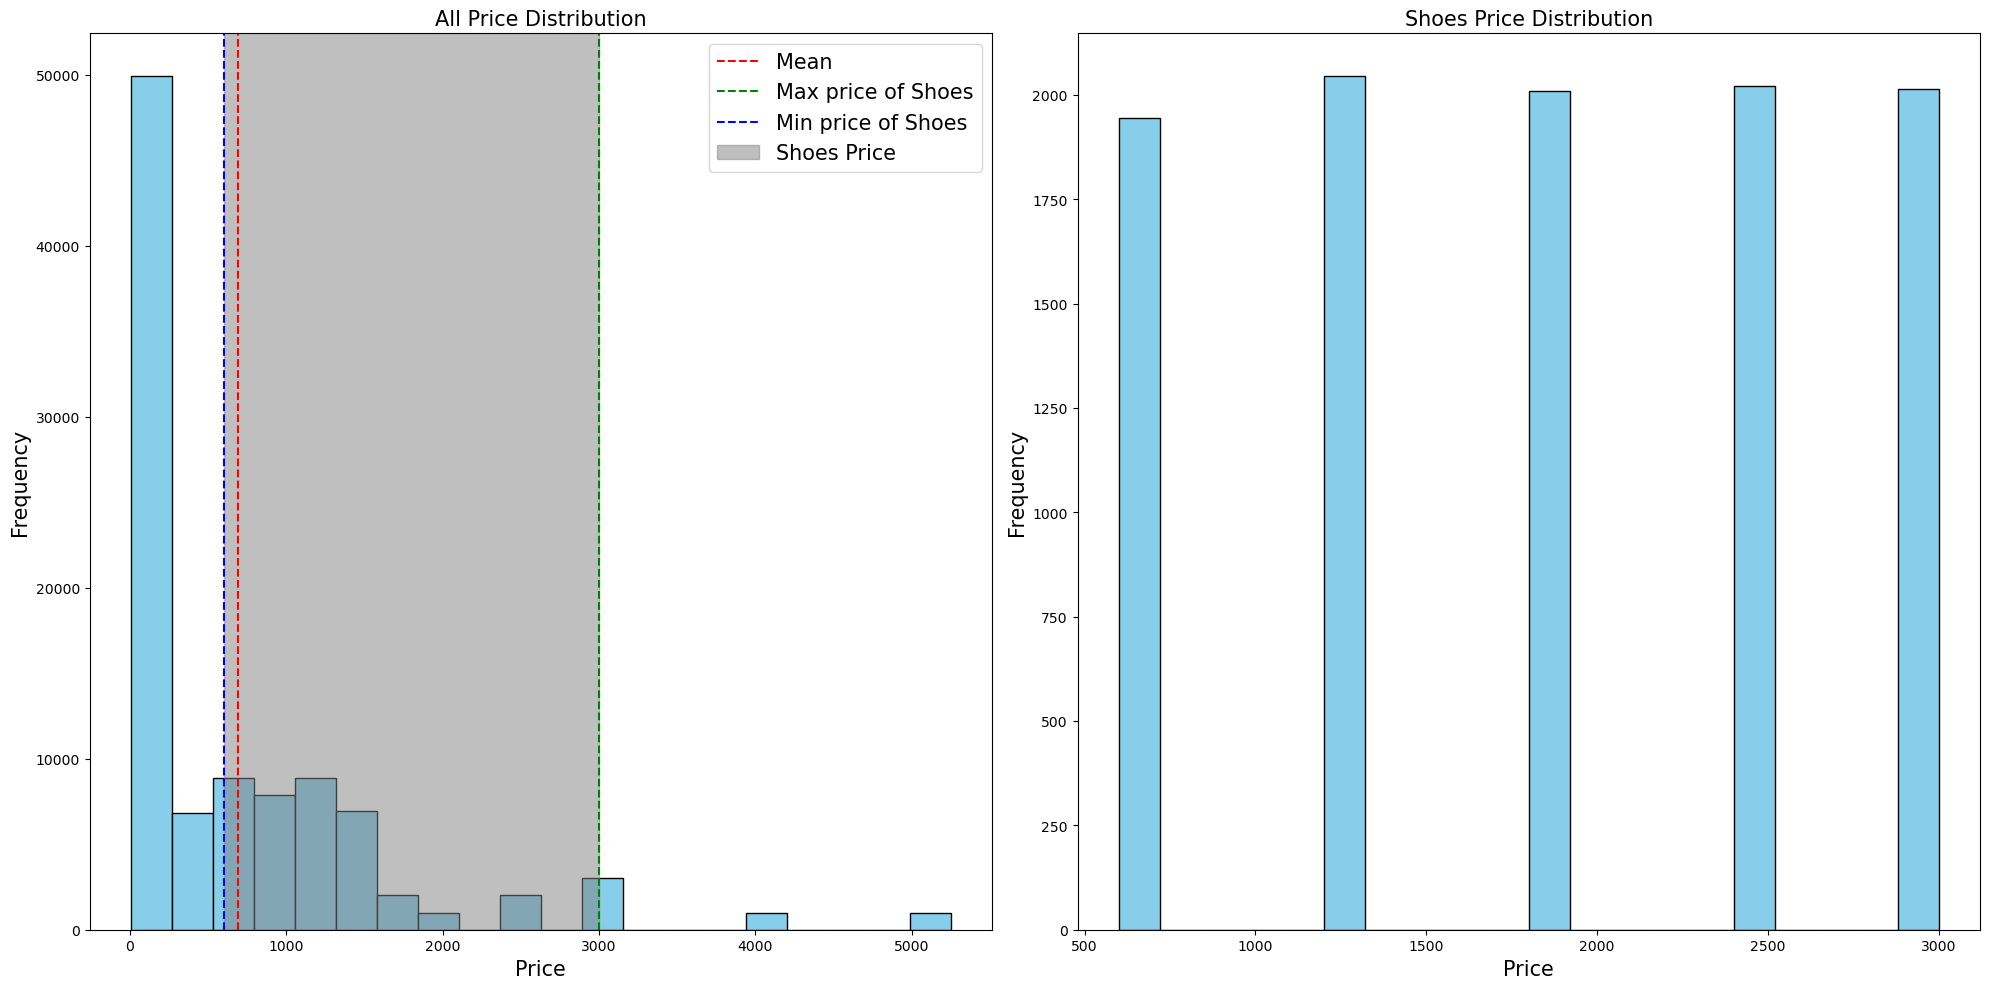

In [256]:
# 가격 분포 시각화 (히스토그램)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes = axes.flatten()
axes[0].hist(cs_result_df['price'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('All Price Distribution', fontsize=15)
axes[0].set_xlabel('Price', fontsize=15)
axes[0].set_ylabel('Frequency', fontsize=15)
mean_value = cs_result_df['price'].mean()
axes[0].axvline(x=mean_value, color='red', linestyle='--', label='Mean')

shoes_max_value = cs_shoes_price_df.describe().T.loc['price', 'max']
shoes_min_value = cs_shoes_price_df.describe().T.loc['price', 'min']
axes[0].axvline(x=shoes_max_value, color='green', linestyle='--', label='Max price of Shoes')
axes[0].axvline(x=shoes_min_value, color='blue', linestyle='--', label='Min price of Shoes')
axes[0].axvspan(shoes_min_value, shoes_max_value, color='gray', alpha=0.5, label='Shoes Price')

axes[1].hist(cs_shoes_price_df, bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('Shoes Price Distribution', fontsize=15)
axes[1].set_xlabel('Price', fontsize=15)
axes[1].set_ylabel('Frequency', fontsize=15)


axes[0].legend(fontsize=15)
plt.tight_layout()
plt.show()

### 요약
📌 요약하자면, 주어진 데이터에서 성별이나 나이(연령대)에 따른 고객 등급 분포는 전체적으로 고른 양상을 보였으나 제품의 카테고리에 따른 주요 구매 고객 등급 분포 양상은 다양하게 나타났다.   
  
📌 특히 의류(Clothing), 도서(Books), 신발(Shoes), 기술(Technology) 카테고리의 제품들이 각기 서로 다른 분포 양상을 보였다. 의류 카테고리의 경우 전체적인 고객 등급 분포 양상과 유사한 형태를 띠었으나, 도서의 경우 VIP 등급 고객의 구매 비율이 가장 낮았으며 신발의 경우 전체 등급이 모두 고른 분포를 보였다. 기술 카테고리의 경우 다른 카테고리와는 달리 VIP 등급의 비율이 가장 높은 양상을 보였다.  
  
📌 위 현상의 원인을 분석하고자 3가지 가설을 수립하고 시각화를 통해 검증하였다.  
  
📌 첫 번째 가설은 해당 카테고리들의 고객 분포 차이가 성별에 따른 구매 동향의 차이에서 기인한다는 것이었으나, 시각화 결과 성별에 따른 차이는 나타나지 않았다.  
  
📌 두 번째 가설은 쇼핑몰 점포에 따른 차이에서 기인한다는 것이었으나, 이 가설 또한 시각화 결과 구매량의 차이를 제외하면 등급별 구매 비율이 점포마다 유의미한 차이를 보이지 않았으므로 거짓으로 판별되었다.  
  
📌 마지막 가설은 카테고리별 가격 분포 및 평균 가격의 차이에서 기인한다는 것이었으며, 시각화 결과 VIP 등급의 구매 비율이 가장 낮았던 도서 카테고리와 VIP 등급의 구매 비율이 가장 높았던 기술 카테고리의 가격 분포 및 평균 가격의 차이가 가장 크게 나타났다.     
이는 고객 등급 산정의 기준이 된 RFM 점수 중 특히 M(Monetary)에 기술 카테고리의 높은 평균 가격이 크게 기여했기 때문으로 예상된다.  
  
📌 한편, 신발 카테고리의 경우 전체 평균 가격인 약 689리라(TL)보다 대체로 높은 가격대를 형성하였으며, 신발 카테고리 가격의 하위 25%값(약 1200.34)이 전체 가격의 상위 25%값(약 1200.32)과 유사하였음에도 불구하고 전체적으로 고른 고객 분포를 보였다.   
이는 소비자의 구매 동향에 제품의 가격 외에도 복합적인 요인들이 영향을 미칠 수 있음을 시사한다.  

### 마케팅 전략 제안

- VIP 등급의 비율이 낮은 도서(Books) 카테고리 제품의 경우, 가격 인상에 한계가 있는 카테고리 특성상 가격 조정보다는 판매량(Frequency)을 늘리기 위한 마케팅 전략이 더 효과적일 수 있습니다. 예를 들어, 유명 작가를 초청한 행사 또는 소비자들의 독서 욕구를 자극할 수 있는 캠페인 등을 개최함으로써 도서 제품에 대한 접근성과 수요를 증가시킬 수 있습니다. 또한 쇼핑몰 내에서 최근 구매일(Recency)과 구매 횟수(Frequency)를 바탕으로 점수를 산정하여 독서 랭킹 서비스 등을 제공하는 것이 도움이 될 수 있습니다.  
    
- 전체적으로 고른 고객 등급 분포 양상을 보인 신발(Shoes) 카테고리 제품의 경우, 현재 고객 분포를 유지하면서 판매량(Frequency)과 매출(Monetary)을 모두 늘리기 위해 고객 등급별로 차별화된 마케팅 전략을 수립하는 것이 도움이 될 것으로 예상됩니다. 예를 들어, Bronze나 Silver 등급 고객을 타겟팅하여 다양한 제품의 프로모션 및 할인을 제공함으로써 해당 고객들의 수요와 구매량을 증가시킴과 동시에 새로운 고객을 유치할 수 있습니다. 또한 높은 가치를 가진 제품에 대한 수집이나 소장, 또는 중고 거래가 활발히 이루어지는 신발 카테고리 제품의 특성을 고려하여, 아티스트와의 콜라보 등을 통해 희소성과 가치가 높은 새로운 한정판 제품을 출시함으로써 Diamond 및 VIP 등급의 충성 고객들을 대상으로 매출(Monetary)을 증대시킬 수 있습니다.
  
- VIP 등급 고객의 비중이 다른 각 등급에 비해 약 2배 높은 기술(Technology) 카테고리 제품의 경우, 현재의 높은 VIP 등급 고객을 유지하면서 기존 고객의 수요 및 신규 고객수를 늘림으로써 판매량(Frequency)과 매출(Monetary)을 증가시키기 위한 다양한 이벤트를 진행하는 것이 효과적일 수 있습니다. 예를 들어, 첫 구매 이벤트 등 신규 고객을 대상으로 한 할인 이벤트를 진행하는 것이 도움이 될 것으로 예상됩니다. 또한 기술 카테고리의 특성상 평균 가격은 높지만 제품의 상세 정보에 대한 접근성이 다소 낮을 수 있다는 점을 고려하여, 관련 인플루언서 등과의 콜라보를 통해 제품과 브랜드를 홍보함으로써 접근성을 향상시킴과 동시에 제품의 가치에 대한 인식을 제고함으로써 판매량과 매출을 증가시킬 수 있습니다.

### 도서 -> 관광객이 대부분이라는 사실을 고려하여, 독서랭킹 서비스는 주민 대상이므로 이것보다는 터키 고유의 책, 터키의 건축물에 관련된 책 등 터키와 관련된 도서들을 집중적으로 홍보하여 판매하는 전략